1) Crie um script que receba uma lista de abreviaturas de meses (MAR, ABR, MAI,
JUN, etc) como argumento e gera as pastas e gráficos necessários para os meses
de referência.
Exemplo:
python “gerar analise.py” MAR ABR MAI JUN JUL
Deve gerar o seguinte resultado de diretórios e gráficos:
2019-03
2019-04
2019-05
2019-06
2019-07

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

sns.set_theme()  

In [23]:
def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada', arquivo = 'nada', folder = 'nada'):
    if opcao == 'nada':# Opção de gráfico de linha simples sem agregações
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort': # Opção de gráfico de linha com ordenação especifica
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack': # Opção de grafico de linha com o eixo y contendo variaveis especificas
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    #acima criei os graficos e agora vou salvar na pasta com o nome que foi passado por parametro
    if (pasta != 'nada'):
        plt.savefig(folder + arquivo + '.png')
        
    return None

In [26]:
lista_meses_input = input("Digite as 3 primeiras letras dos meses desejados, separados por vírgula e em maiúsculo: ").upper()

meses_validos = ["MAR", "ABR", "MAI", "JUN", "JUL", "AGO", "SET", "OUT", "NOV", "DEZ"]

lista_meses_validos = []  
for mes in lista_meses_input.split(","):
  mes = mes.strip()  # Removo espaços em branco
  #Verifico se os meses que o usuario digitou são validos
  if mes in meses_validos:
    lista_meses_validos.append(mes)

if not lista_meses_validos:
  print("Nenhum mês válido informado.")
  exit()
print(lista_meses)

Digite as 3 primeiras letras dos meses desejados, separados por vírgula e em maiúsculo: JUN, JUL, AGO
MAR,ABR


Gerado na pasta: ./Mod14/output/figs/2019-06/
Gerado na pasta: ./Mod14/output/figs/2019-07/
Gerado na pasta: ./Mod14/output/figs/2019-08/


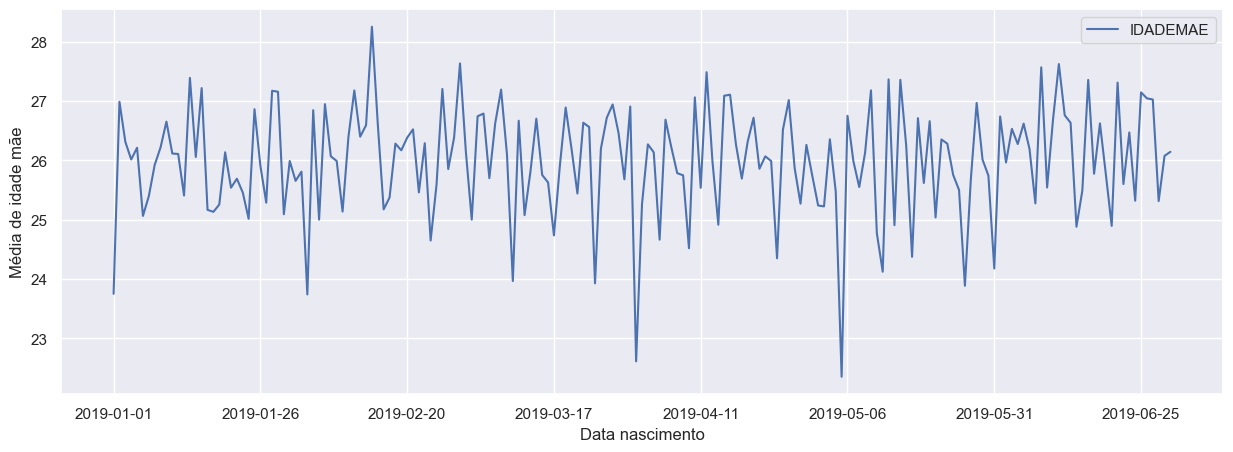

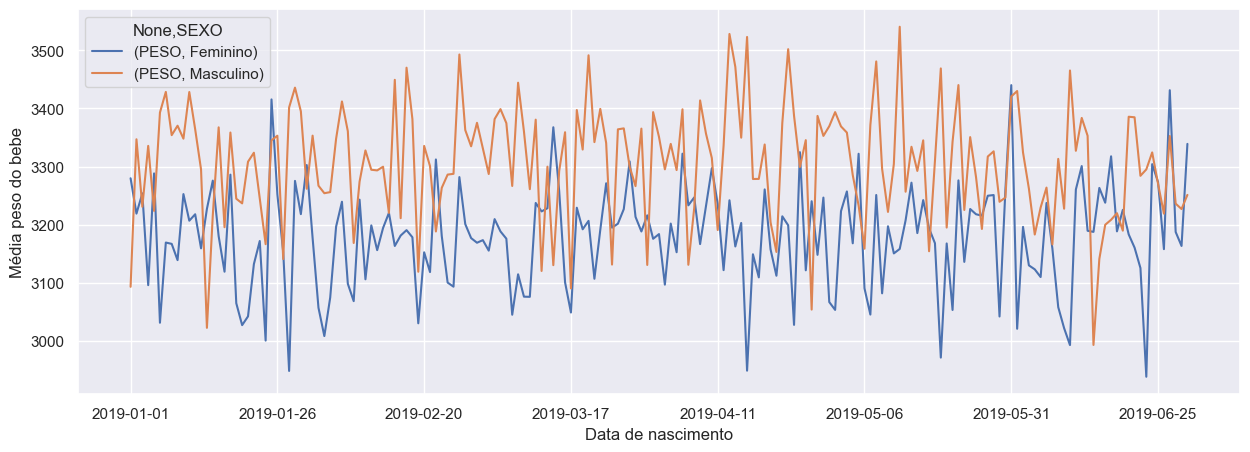

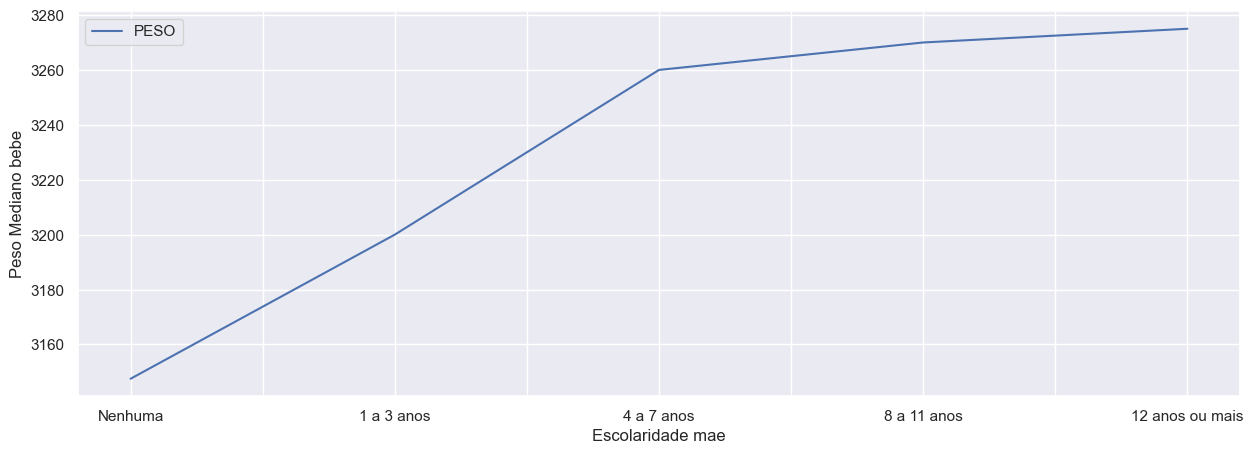

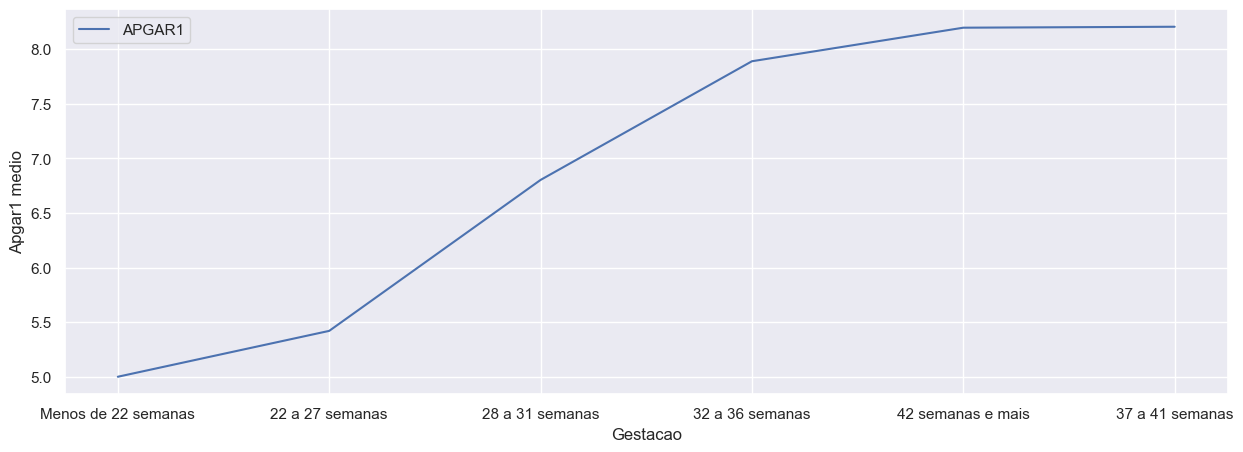

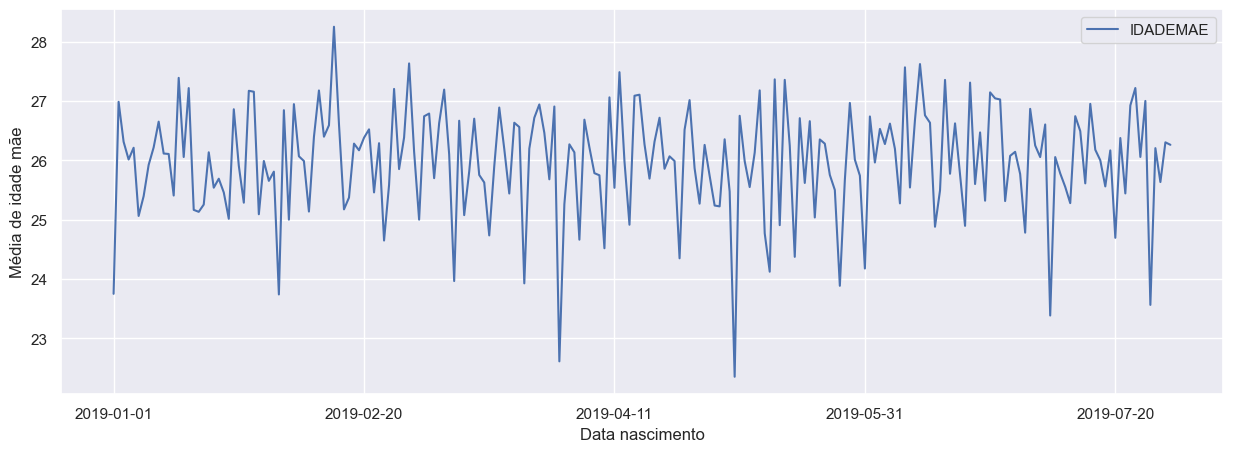

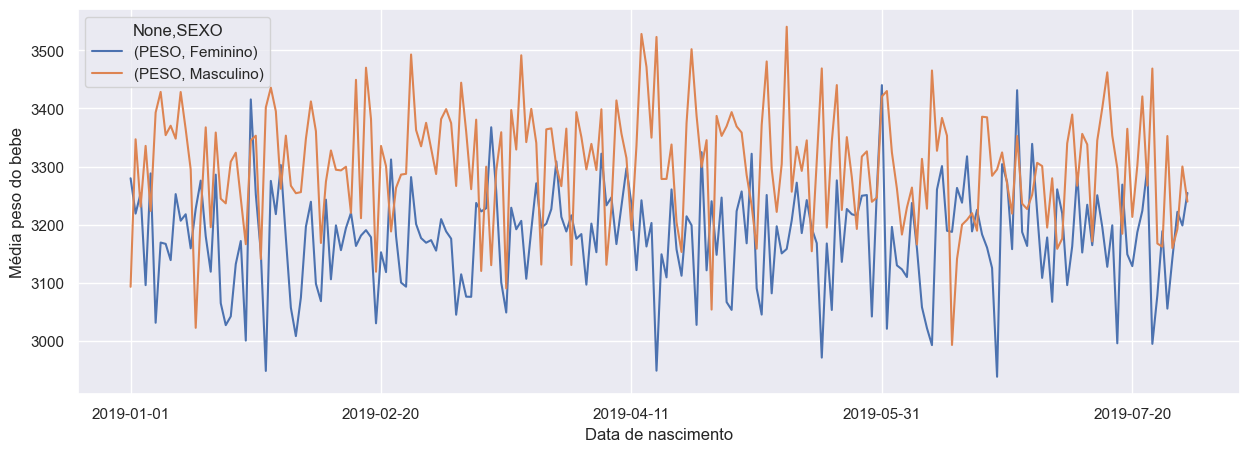

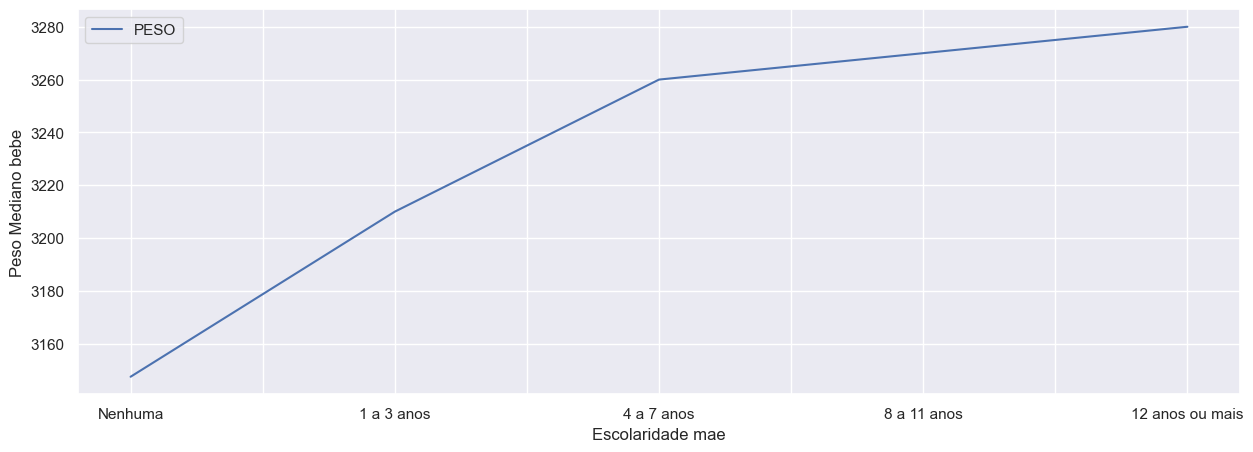

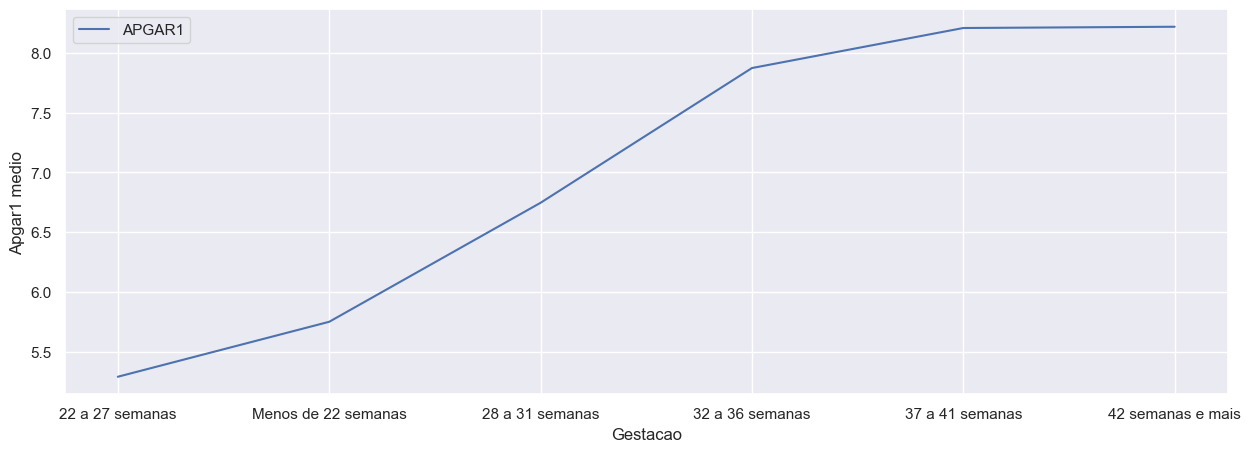

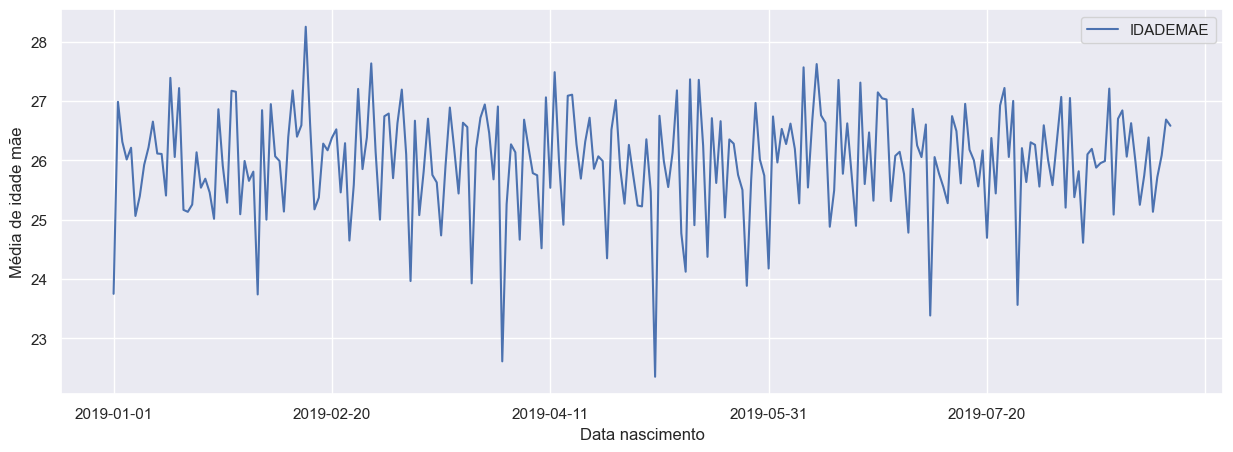

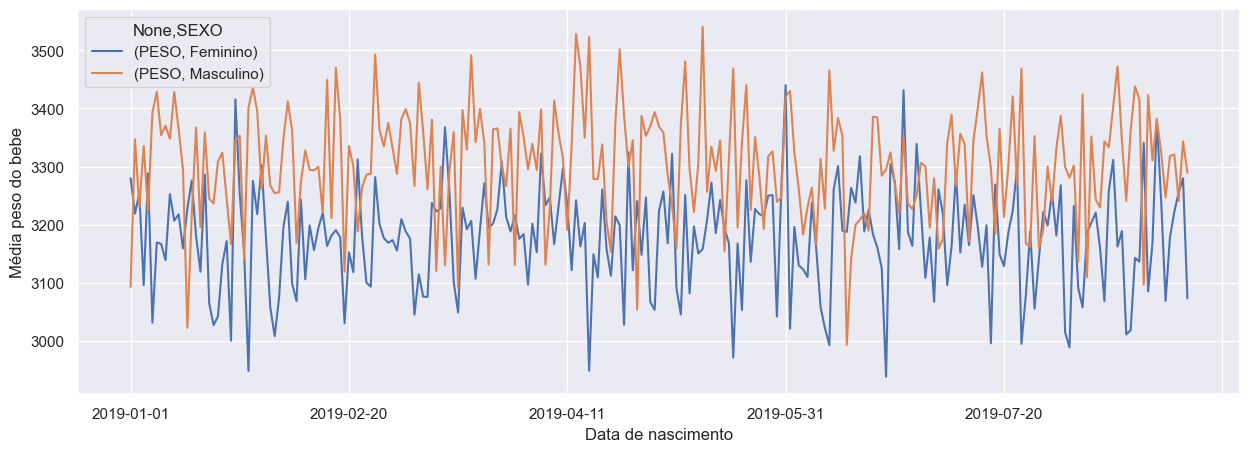

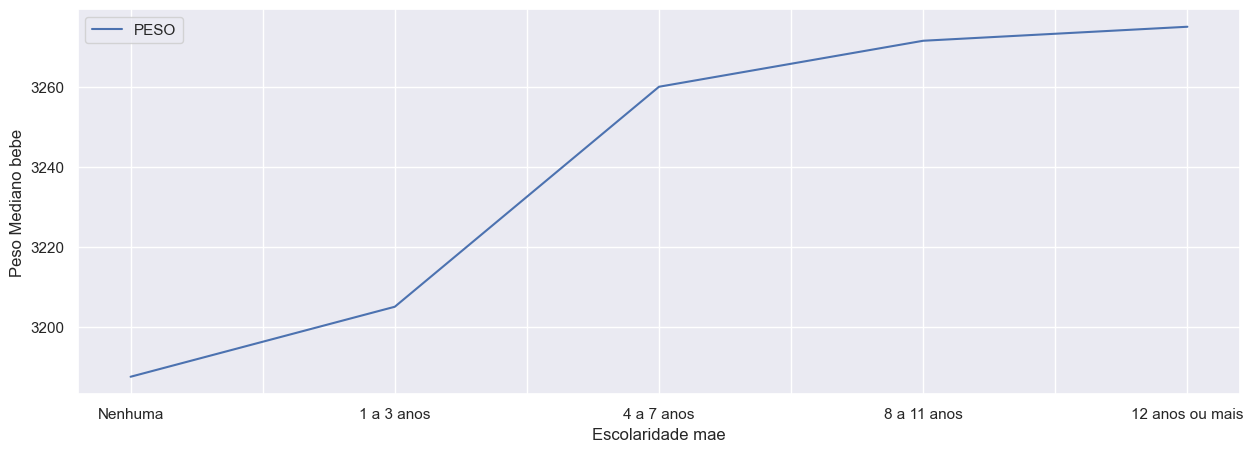

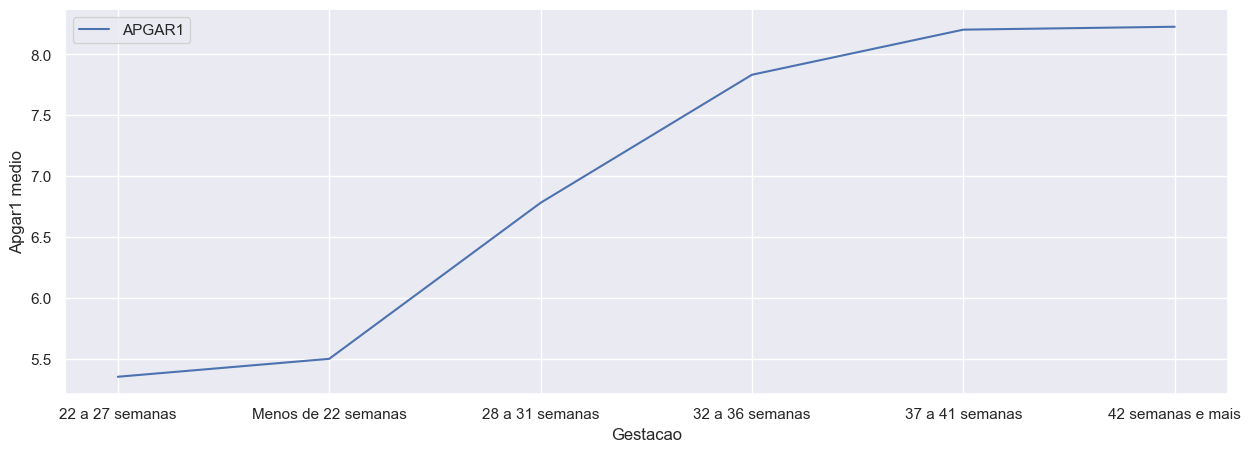

In [27]:
#lista de possíveis opções de graficos que serão gerados para cada interação...
opcoes = [['IDADEMAE', 'DTNASC', 'mean', 'Média de idade mãe', 'Data nascimento', 'nada' , 'media idade mae por data'],
    ['PESO', ['DTNASC', 'SEXO'], 'mean', 'Média peso do bebe','Data de nascimento','unstack', 'media peso bebe por sexo'],
    ['PESO', 'ESCMAE', 'median', 'Peso Mediano bebe','Escolaridade mae','sort', 'mediano por escolaridade mae'],
    ['APGAR1', 'GESTACAO', 'mean', 'Apgar1 medio','Gestacao','sort', 'media apgar1 por gestacao']]

#pastas de destino
pasta_out = './Mod14/output/figs/'

for m in lista_meses_validos:
    arquivo = './input/SINASC_RO_2019_' + m + '.csv'
    sinasc = pd.read_csv(arquivo)
    #nomear e criar a pasta de destino
    max_data = sinasc.DTNASC.max()[:7]
    pasta = pasta_out + max_data + '/'
    os.makedirs(pasta_out+max_data+ '/', exist_ok=True)
    #Subloop utilizado para interagir em cada opção da lista de opções de graficos.
    for opcao in opcoes:
        #chamo a minha função para gerar e salvar o gráfico na pasta
        plota_pivot_table(sinasc, opcao[0], opcao[1], opcao[2], opcao[3], opcao[4], opcao[5], opcao[6],pasta)    
    
    print(f'Gerado na pasta: {pasta}')